In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.9/896.9 kB 23.3 MB/s eta 0:00:00


In [8]:
!pip install torch

In [9]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.8/112.6 GB disk)


In [10]:
from ultralytics import YOLO
from IPython.display import Image

In [14]:
#Dataset

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="BEVURjth61QhWdaJyfi0")
project = rf.workspace("project-uyrxf").project("ppe_detection-v1x3l")
version = project.version(2)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...


In [16]:
dataset.location

'/content/PPE_Detection-2'

In [23]:
model=YOLO('yolo11m.pt')

100%|██████████| 38.8M/38.8M [00:00<00:00, 125MB/s]


In [26]:
#Train the model

!yolo task=detect mode=train data='/content/PPE_Detection-2/data.yaml' model=yolo11n.pt epochs=20 imgsz=640

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/PPE_Detection-2/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

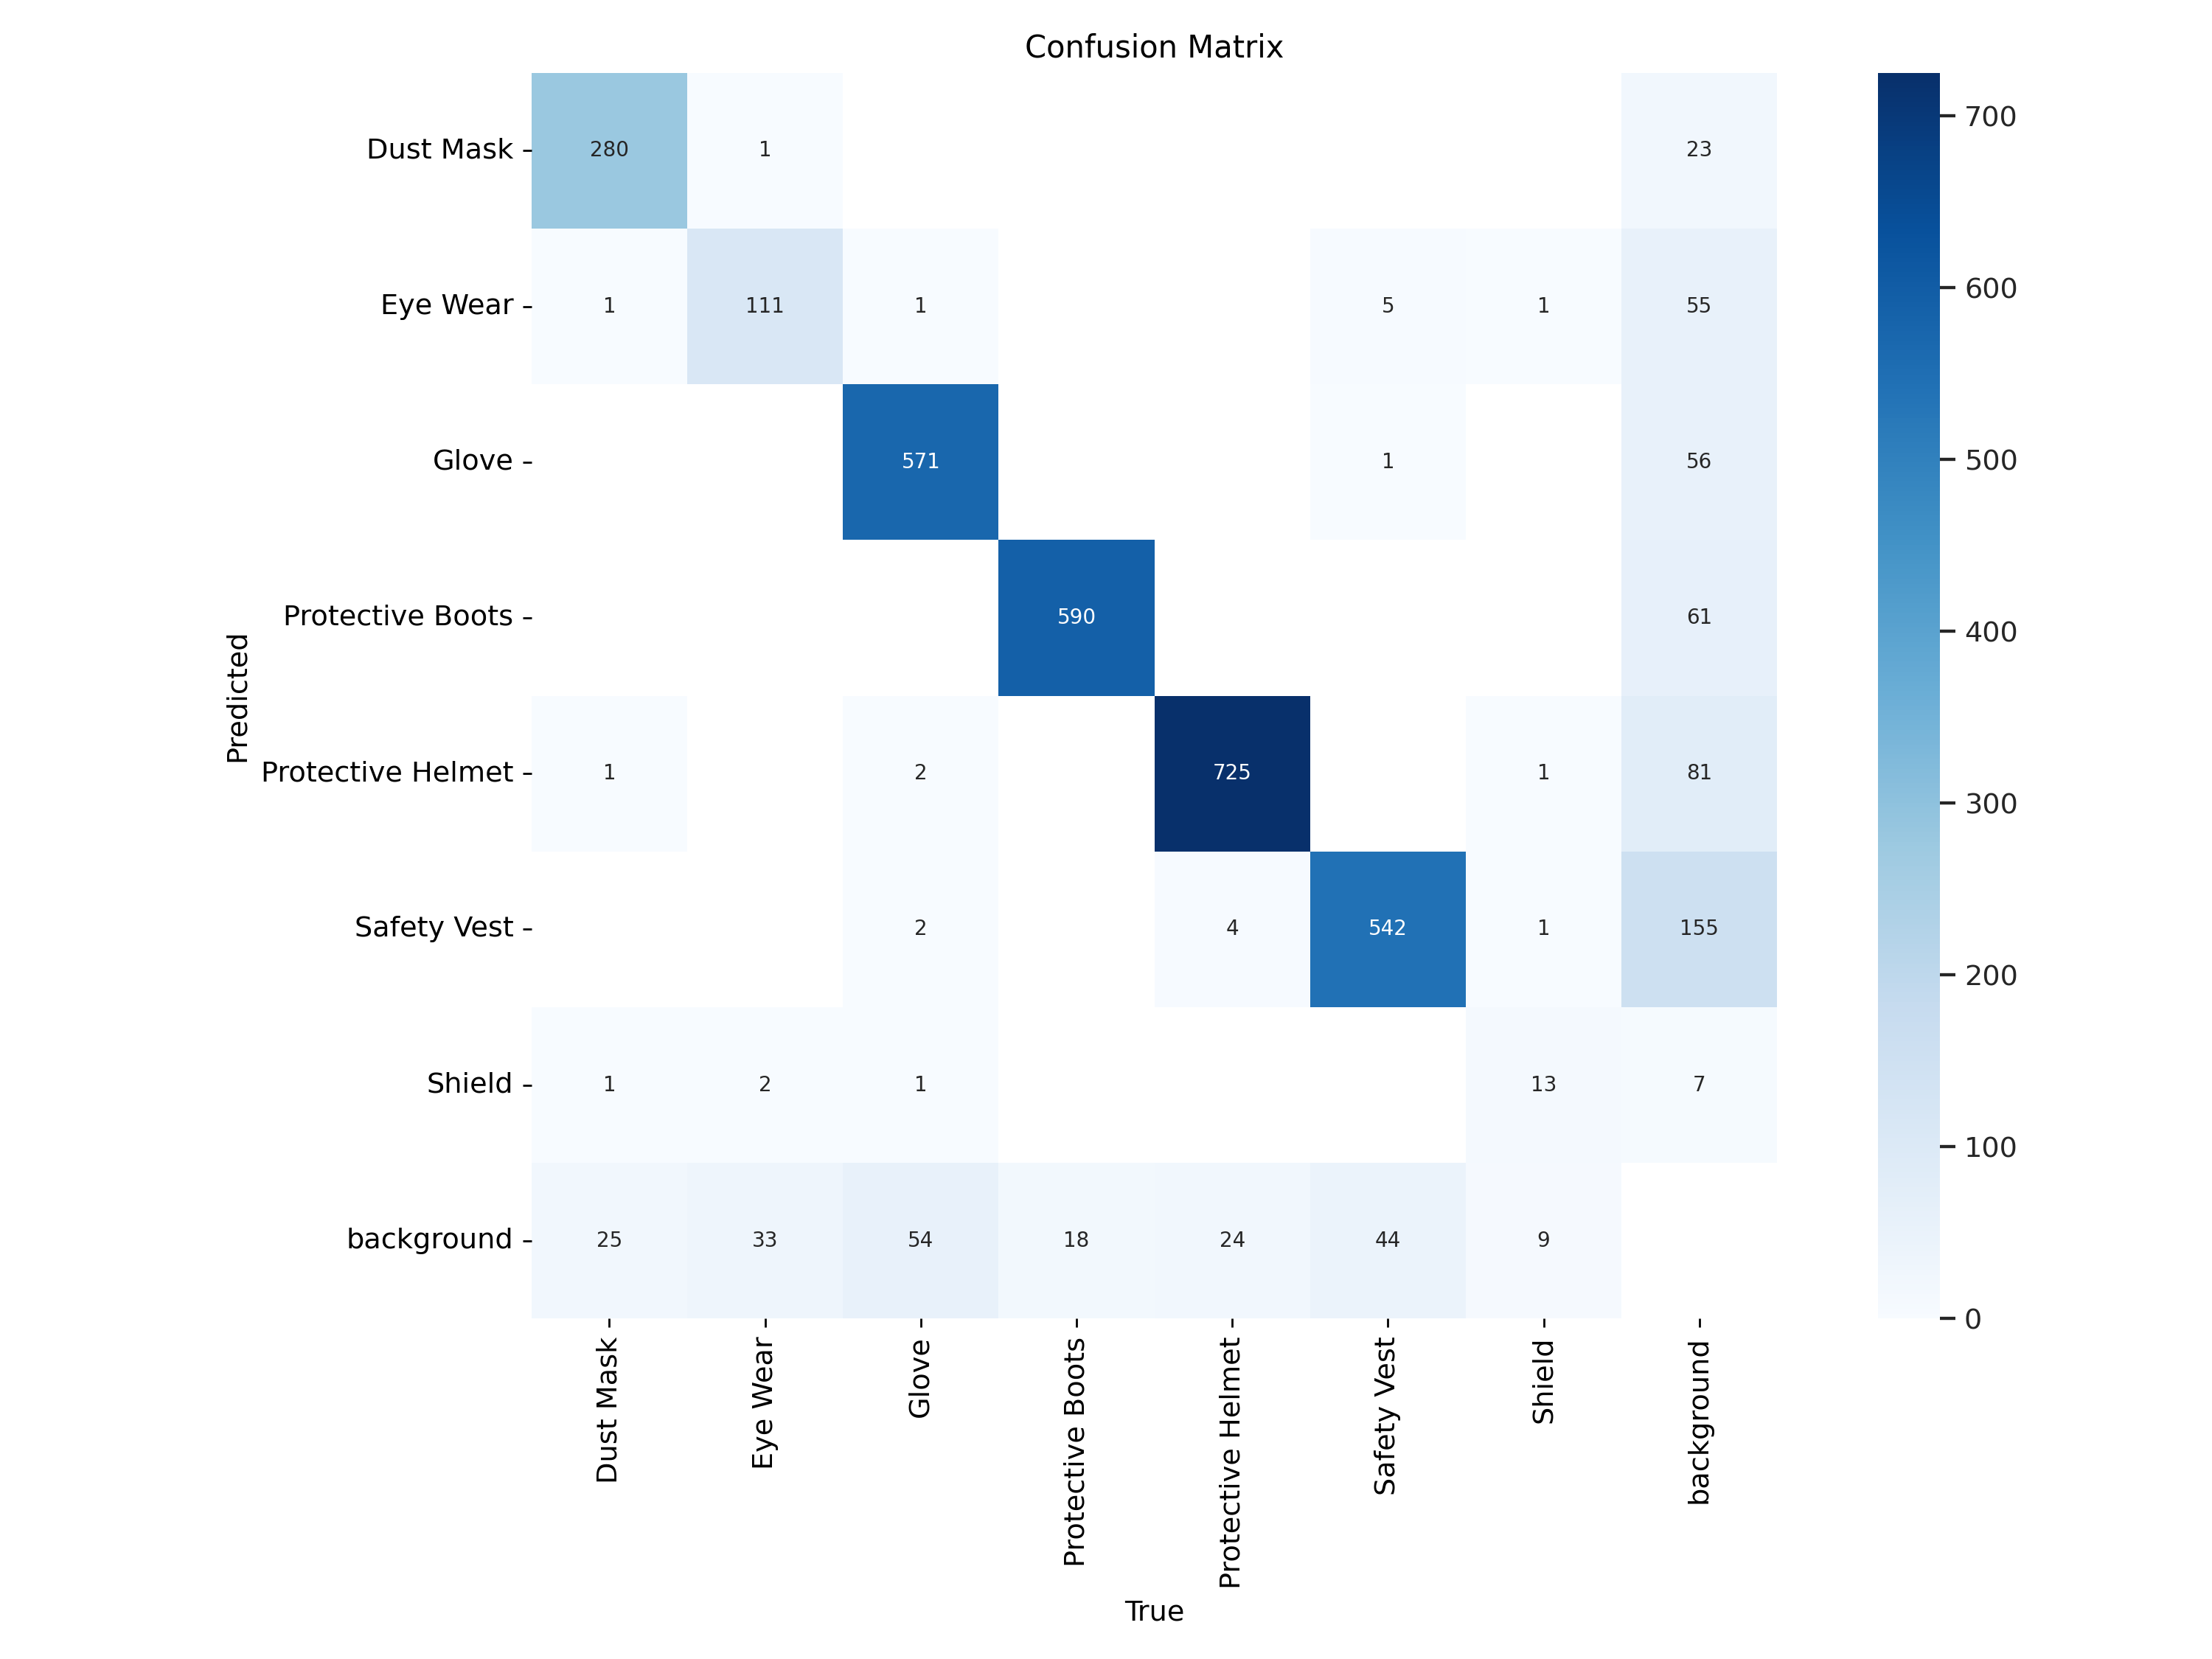

In [28]:
Image('/content/runs/detect/train2/confusion_matrix.png', width=800)

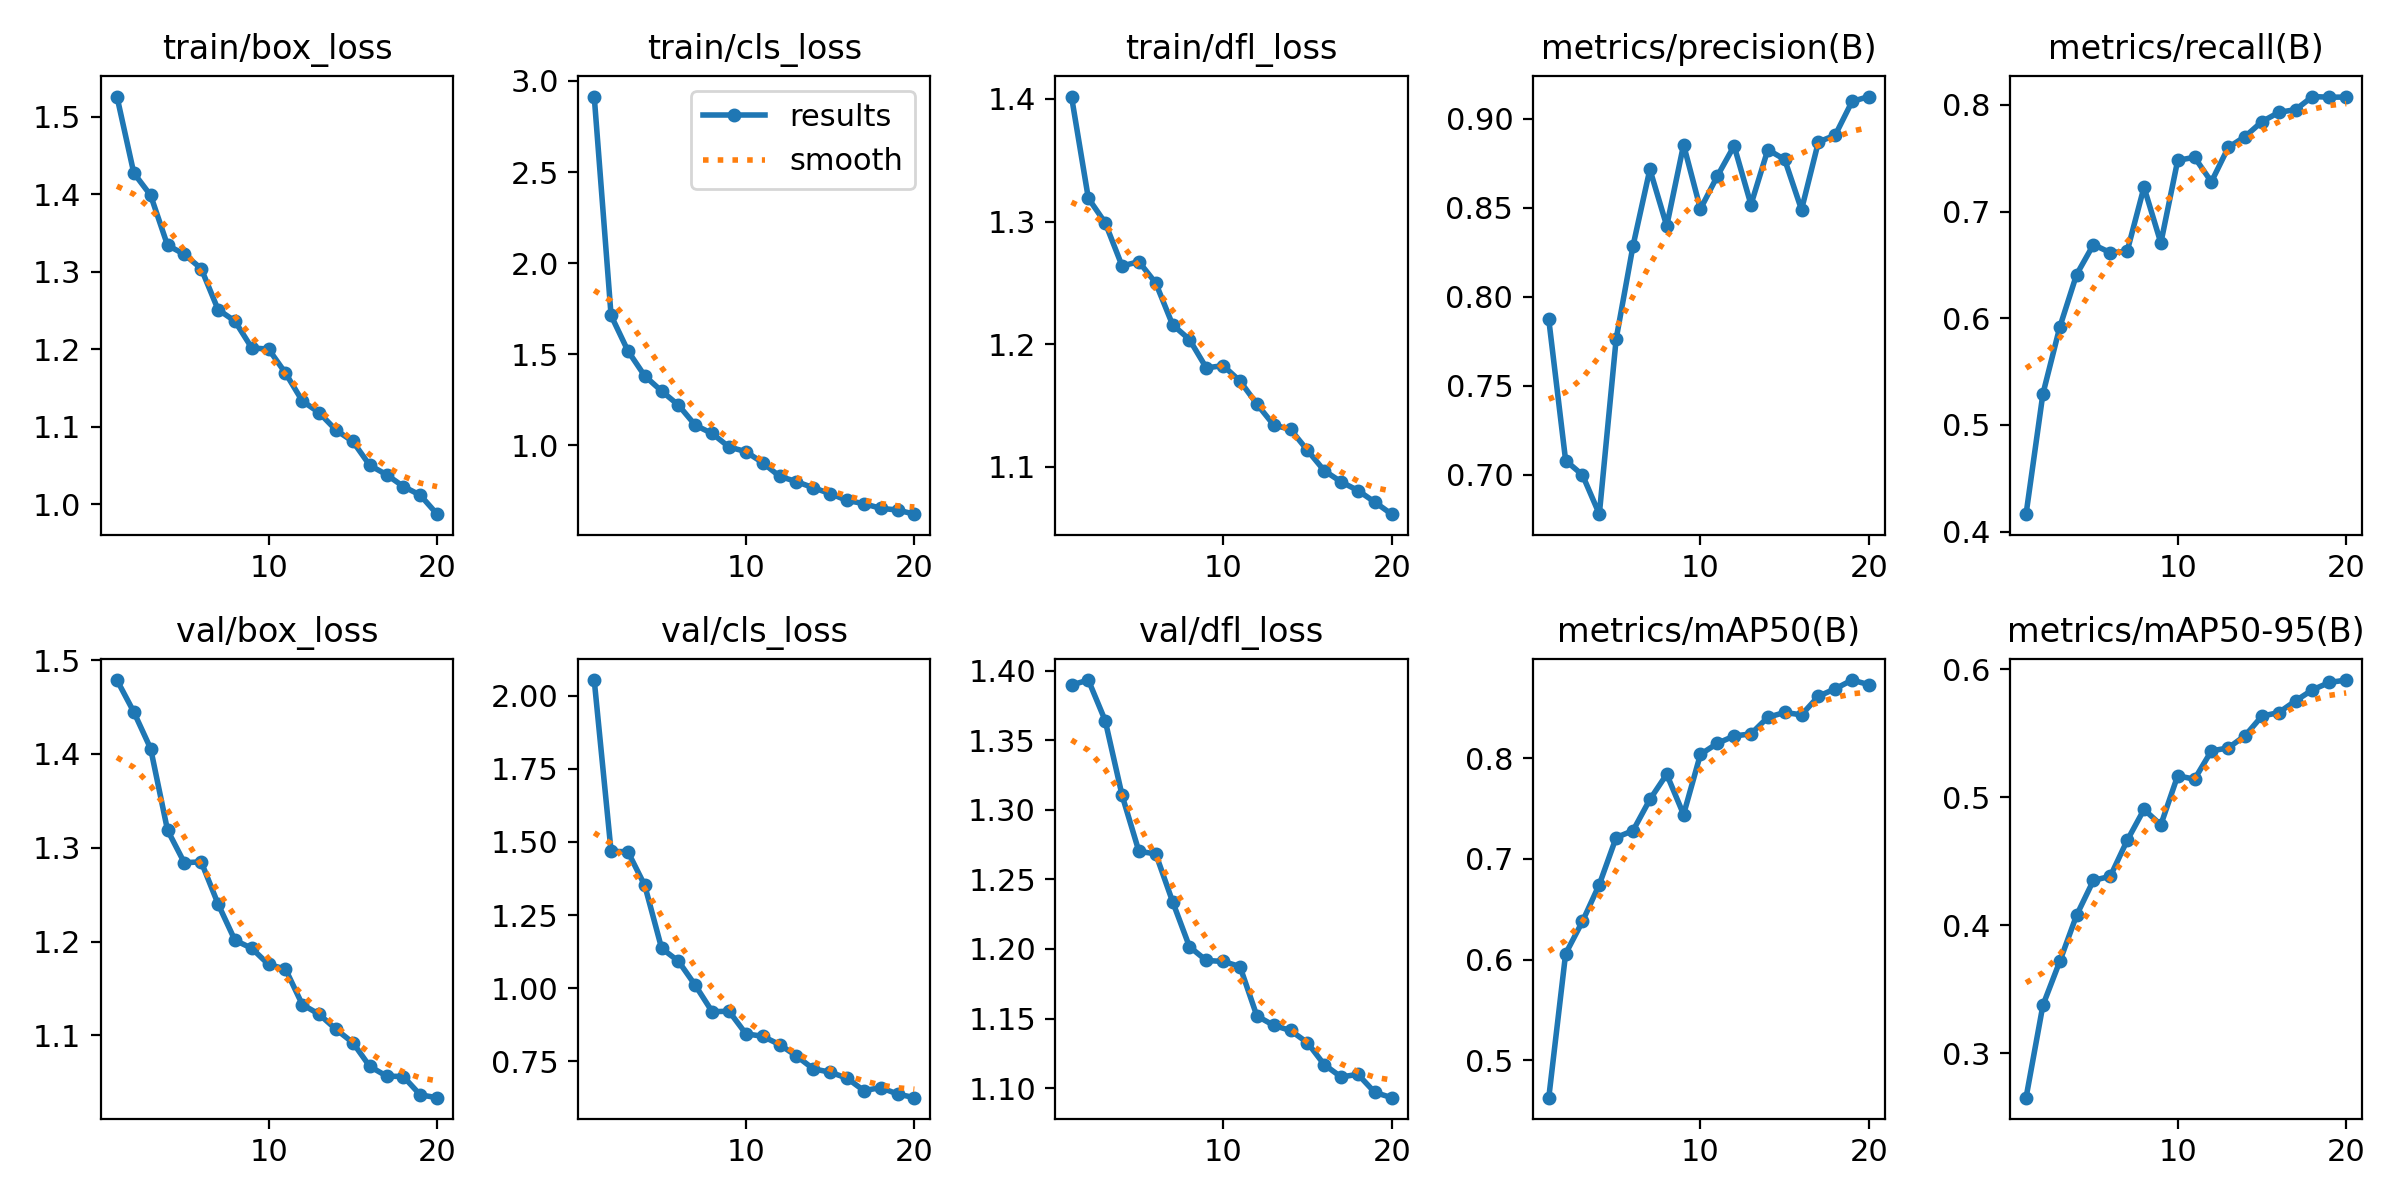

In [29]:
Image('/content/runs/detect/train2/results.png',width=800)

In [30]:
#Validate the model

!yolo task=detect mode=val model='/content/runs/detect/train2/weights/best.pt' data=/content/PPE_Detection-2/data.yaml

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/PPE_Detection-2/valid/labels.cache... 637 images, 0 backgrounds, 0 corrupt: 100% 637/637 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 40/40 [00:08<00:00,  4.76it/s]
                   all        637       3064      0.911      0.807      0.872      0.592
             Dust Mask        299        308      0.979      0.892      0.951      0.632
              Eye Wear        146        147      0.824      0.667      0.738      0.401
                 Glove        346        631      0.952      0.881      0.931      0.652
      Protective Boots        298        608      0.957      0.947      0.981      0.684
     Protective Helmet        403        753      0.948       0.94      0.977      0.728
           Safety Vest        359        592  

In [33]:
# performing inference on test images

!yolo task=detect mode=predict model='/content/runs/detect/train2/weights/best.pt' conf=0.25 source='/content/PPE_Detection-2/test/images' save=True

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

image 1/322 /content/PPE_Detection-2/test/images/000446_jpg.rf.63a960737ed4b762294eea1ad1a92791.jpg: 640x640 1 Dust Mask, 1 Glove, 2 Protective Helmets, 10.4ms
image 2/322 /content/PPE_Detection-2/test/images/20220721_161946_jpg.rf.905c375aa964159f9edab2a55a6e7476.jpg: 640x640 (no detections), 8.6ms
image 3/322 /content/PPE_Detection-2/test/images/20220721_162015_jpg.rf.ccb5d8a5aed0bb50c04431fa0b0d5479.jpg: 640x640 1 Dust Mask, 1 Protective Helmet, 8.0ms
image 4/322 /content/PPE_Detection-2/test/images/20220721_162036_jpg.rf.2664c2f59604cd2380a51fd174055a7e.jpg: 640x640 1 Glove, 8.0ms
image 5/322 /content/PPE_Detection-2/test/images/20220721_162308_jpg.rf.913971a6c64f38eabc6b69bab4409b46.jpg: 640x640 2 Eye Wears, 1 Glove, 9.6ms
image 6/322 /content/PPE_Detection-2/test/images/20220721_162435_jpg.rf.d478427044384d4e32ba0c25

In [34]:
#testing new image
!yolo task=detect mode=predict model='/content/runs/detect/train2/weights/best.pt' conf=0.25 source='/content/PPE.png' save=True

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/PPE.png: 416x640 4 Protective Helmets, 5 Safety Vests, 80.4ms
Speed: 3.5ms preprocess, 80.4ms inference, 1404.6ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


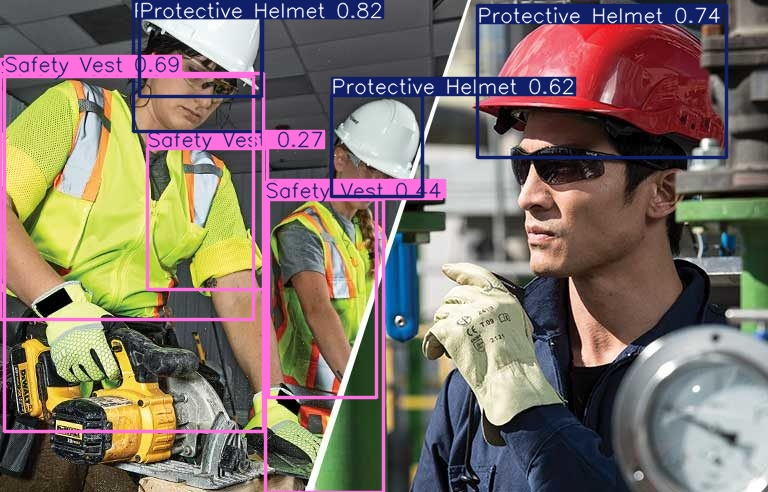

In [35]:
Image('/content/runs/detect/predict2/PPE.jpg',width=800)